## Objective

1. Plot results to compare performence of three datasets
    1. word embedding result gave by highest classifier
    2. traditional feature result gave by  hig
    3. ML classifier performence

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.insert(1,'G:\\Github\\Sinhala-Hate-Speech-Detection')
import utills
import warnings
warnings.filterwarnings("ignore")

In [53]:
import matplotlib.font_manager as font_manager
#path = 'F:/Downloads/0KDARALIYA Regular/0KDARALIYA Regular/0KDARALIYA Regular.ttf'
path = 'C:/Users/Kavishka/anaconda3/Library/share/fonts/Nirmala.ttf'
prop = font_manager.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()

### Summary of feature algorithm results for df_A


In [4]:
## Read result csv files
w2v = pd.read_csv('embedding_df_A.csv',sep='\t')
bow = pd.read_csv('bow_word_df_A.csv',sep='\t')
bow_char = pd.read_csv('bow_char_df_A.csv',sep='\t')
tfidf_word = pd.read_csv('tfidf_char_df_A.csv',sep='\t')
tfidf_char = pd.read_csv('tfidf_word_df_A.csv',sep='\t')

In [3]:
import pandas as pd
df_ML = pd.DataFrame(index =['BOW','Char n-gram','TFIDF word','Char n-gram TFIDF','W2V CBOW','W2V skip-gram','Fasttext'] ,columns=['LR','SVM', 'NB','RF'])
df_ML

,LR,SVM,NB,RF
BOW,NaN,NaN,NaN,NaN
Char n-gram,NaN,NaN,NaN,NaN
TFIDF word,NaN,NaN,NaN,NaN
Char n-gram TFIDF,NaN,NaN,NaN,NaN
W2V CBOW,NaN,NaN,NaN,NaN
W2V skip-gram,NaN,NaN,NaN,NaN
Fasttext,NaN,NaN,NaN,NaN


In [18]:
bow

,Model,Accuracy,F1-score,Recall,Precision,AUC
0,LR,0.830928,0.699634,0.632450,0.782787,0.776555
1,SVM_linear,0.816495,0.698305,0.682119,0.715278,0.779682
2,NB,0.611856,0.517617,0.668874,0.422153,0.627476
3,RF,0.836598,0.689520,0.582781,0.844125,0.767064


In [5]:
w2v

,Model,Accuracy,F1-score,Recall,Precision,AUC
0,LR+W2V skipgram,0.793814,0.632353,0.569536,0.710744,0.732373
1,SVM+W2V skipgram,0.791753,0.635379,0.582781,0.698413,0.734505
2,NB+W2V skipgram,0.578351,0.547566,0.819536,0.411130,0.644424
3,RF+W2V skipgram,0.789691,0.554585,0.420530,0.814103,0.688558
4,LR+W2V CBOW,0.782474,0.607076,0.539735,0.693617,0.715975
5,SVM+W2V CBOW,0.779381,0.598499,0.528146,0.690476,0.710555
6,NB+W2V CBOW,0.569588,0.537396,0.802980,0.403830,0.633526
7,RF+W2V CBOW,0.775773,0.497110,0.355960,0.823755,0.660765
8,LR+fasttext,0.758763,0.468182,0.341060,0.746377,0.644332
9,SVM+fasttext,0.761340,0.465975,0.334437,0.768061,0.644389


In [6]:
df_ML.iloc[0]=bow.loc[:,'F1-score']*100
df_ML.iloc[1]=bow_char.loc[:,'F1-score']*100
df_ML.iloc[2]=tfidf_word.loc[:,'F1-score']*100
df_ML.iloc[3]=tfidf_char.loc[:,'F1-score']*100
df_ML.iloc[5] = w2v.loc[:3,'F1-score']*100
df_ML.iloc[4] =w2v.loc[4:7,'F1-score']*100
df_ML.iloc[6] = w2v.loc[8:11,'F1-score']*100
df_ML.to_csv('summary_chart.csv',index_label="Feature")
df_ML

,LR,SVM,NB,RF
BOW,69.9634,69.8305,51.7617,68.952
Char n-gram,73.7027,71.0813,46.4539,72.7273
TFIDF word,62.8009,73.2824,43.699,71.8101
Char n-gram TFIDF,61.1588,71.0623,48.18,68.1452
W2V CBOW,60.7076,59.8499,53.7396,49.711
W2V skip-gram,63.2353,63.5379,54.7566,55.4585
Fasttext,46.8182,46.5975,55.814,55.0218


In [7]:
df_M= pd.read_csv('summary_chart.csv',index_col='Feature')
df_M

,LR,SVM,NB,RF
Feature,,,,
BOW,69.9634,69.8305,51.7617,68.9520
Char n-gram,73.7027,71.0813,46.4539,72.7273
TFIDF word,62.8009,73.2824,43.6990,71.8101
Char n-gram TFIDF,61.1588,71.0623,48.1800,68.1452
W2V CBOW,60.7076,59.8499,53.7396,49.7110
W2V skip-gram,63.2353,63.5379,54.7566,55.4585
Fasttext,46.8182,46.5975,55.8140,55.0218


### Plot ML summary

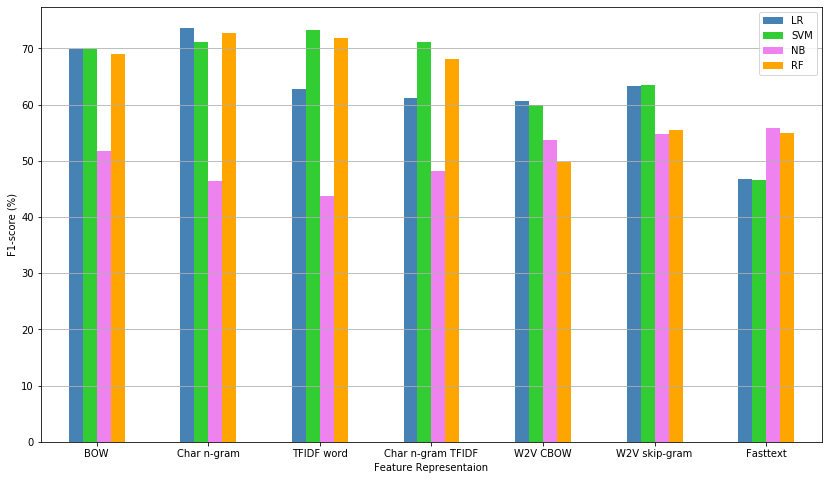

<Figure size 432x288 with 0 Axes>

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
df_M.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet','orange'])

plt.xticks( rotation=0)
plt.xlabel('Feature Representaion')
plt.ylabel('F1-score (%)')
plt.grid(axis='y')

f1_score = df_M.values.flatten()


plt.show()
plt.savefig('summary_of_ML_results.png')

plot summary of df_B

In [ ]:
plt.figure(figsize=(10, 8))
df_M.reset_index()
splot=sns.barplot(x="Education", y="mean_salary", hue="", data=df_M)
plt.ylabel("Mean Salary in US Dollars", size=14)
plt.xlabel("Education", size=14)
plt.title("Annotated Grouped Barplot: Gender Bias in Salary", size=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png

In [ ]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(x="Education", y="mean_salary", hue="Gender", data=df)
plt.ylabel("Mean Salary in US Dollars", size=14)
plt.xlabel("Education", size=14)
plt.title("Grouped Barplot: Gender Bias in Salary", size=18)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()/1000), '.0f')+"K", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Plot CNN

In [47]:
import pandas as pd
df_CNN = pd.DataFrame(index =['Gossip Site (A)','Facebook (B)','Combination (A+B)'] ,columns=['Static','Random','Dynamic'])
df_CNN

,Static,Random,Dynamic
Gossip Site (A),NaN,NaN,NaN
Facebook (B),NaN,NaN,NaN
Combination (A+B),NaN,NaN,NaN


In [51]:
2*4

8

In [53]:
df_CNN.iloc[0] = [0.740201*100,0.713472*100,0.695408*100]
df_CNN.iloc[1] = [0.869522*100,0.874814*100,0.871422*100]
df_CNN.iloc[2] = [0.765777*100,0.797522*100,0.803834*100]

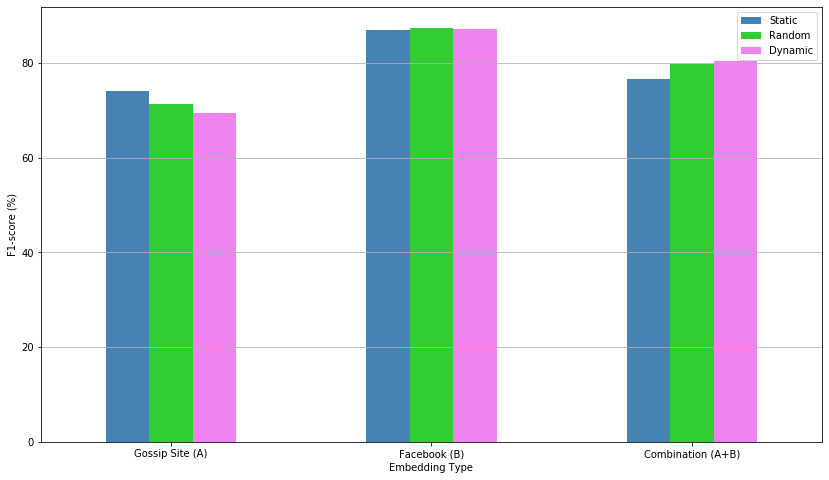

<Figure size 432x288 with 0 Axes>

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
df_CNN.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet'])

plt.xticks( rotation=0)
plt.xlabel('Embedding Type')
plt.ylabel('F1-score (%)')
plt.grid(axis='y')

f1_score = df_CNN.values.flatten()


plt.show()
plt.savefig('summary_of_CNN_results.png')

In [ ]:
df_we.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet'])

plt.xticks( rotation=0)
plt.xlabel('Dataset')
plt.ylabel('Average Accuracy (%)')
plt.grid(axis='y')

accuracies = df_we.values.flatten()

plt.annotate(str(round(accuracies[0],1)), xy=(-0.24, accuracies[0]+0.5), color='black')
plt.annotate(str(round(accuracies[1],1)), xy=(-0.08, accuracies[1]+0.5), color='black')
plt.annotate(str(round(accuracies[2],1)), xy=(0.09, accuracies[2]+0.5), color='black')
plt.annotate(str(round(accuracies[3],1)), xy=(0.76, accuracies[3]+0.5), color='black')
plt.annotate(str(round(accuracies[4],1)), xy=(0.92, accuracies[4]+0.5), color='black')
plt.annotate(str(round(accuracies[5],1)), xy=(1.09, accuracies[5]+0.5), color='black')
plt.annotate(str(round(accuracies[6],1)), xy=(1.76, accuracies[6]+0.5), color='black')
plt.annotate(str(round(accuracies[7],1)), xy=(1.92, accuracies[7]+0.5), color='black')
plt.annotate(str(round(accuracies[8],1)), xy=(2.09, accuracies[8]+0.5), color='black')
plt.annotate(str(round(accuracies[9],1)), xy=(2.76, accuracies[9]+0.5), color='black')
plt.annotate(str(round(accuracies[10],1)), xy=(2.92, accuracies[10]+0.5), color='black')
plt.annotate(str(round(accuracies[11],1)), xy=(3.09, accuracies[11]+0.5), color='black')
plt.annotate(str(round(accuracies[12],1)), xy=(3.76, accuracies[12]+0.5), color='black')
plt.annotate(str(round(accuracies[13],1)), xy=(3.92, accuracies[13]+0.5), color='black')
plt.annotate(str(round(accuracies[14],1)), xy=(4.09, accuracies[14]+0.5), color='black')

plt.show()



### Word cloud

In [2]:
path = '../Datasets/processed/no_preprocessing/'
df_A = pd.read_csv(path+'df_A.csv')    
#df_B = pd.read_csv(path+'df_B.csv')

In [3]:
df = utills.preprocess(df_A,'comment')

In [7]:
word_count = df['cleaned'].apply(lambda x: len(x.split())).sum()
word_count

100262

In [8]:
from collections import Counter

#plt.rc('font', family='Lohit Devanagari')

results = Counter()
df['cleaned'].str.split().apply(results.update)

most = results.most_common()
print(most[:20])

[('මේ', 1153), ('නෑ', 1001), ('වගේ', 913), ('එක', 772), ('කියලා', 751), ('දැන්', 604), ('නම්', 584), ('ඒ', 541), ('තමයි', 535), ('මම', 435), ('ඔය', 379), ('නැති', 359), ('කරන්න', 355), ('ඉන්න', 332), ('වෙලා', 323), ('හරි', 312), ('උන්', 303), ('උඹ', 301), ('ඇති', 299), ('එකක්', 299)]


In [47]:
words = [word for i in df[df['label'] == 1]['cleaned'].str.split() for word in i]

counter = Counter(words)
most_hate = counter.most_common()
    
most_hate[:20]

[('වගේ', 475),
 ('මේ', 444),
 ('නෑ', 309),
 ('කියලා', 299),
 ('එක', 293),
 ('නම්', 212),
 ('තමයි', 201),
 ('උඹ', 191),
 ('නැති', 175),
 ('දැන්', 175),
 ('අනේ', 170),
 ('ඔය', 146),
 ('පල', 142),
 ('මූ', 135),
 ('ඒ', 135),
 ('මම', 128),
 ('ඉන්න', 123),
 ('බං', 120),
 ('වෙලා', 118),
 ('ලොකු', 114)]

In [46]:
words = [word for i in df[df['label'] == 0]['comment'].str.split() for word in i]

counter = Counter(words)
most_non_hate = counter.most_common()
    
most_non_hate[:20]

[('මේ', 642),
 ('එක', 422),
 ('දැන්', 368),
 ('වගේ', 365),
 ('නම්', 345),
 ('ඒ', 337),
 ('කියලා', 312),
 ('නෑ', 301),
 ('මම', 267),
 ('තමයි', 259),
 ('කරන්න', 233),
 ('එකක්', 213),
 ('හරි', 209),
 ('ඔය', 203),
 ('අපේ', 201),
 ('ඉන්න', 198),
 ('නෑ.', 194),
 ('ගැන', 185),
 ('නැති', 179),
 ('වෙලා', 176)]

In [42]:
most_word_list = [ w[0] for w in most]
most_word_count = [ w[1] for w in most]
most_dict = dict(zip(most_word_list, most_word_count))

In [48]:
hate_words = [ w[0] for w in most_hate]
hate_counts = [ w[1] for w in most_hate]
non_hate_words = [ w[0] for w in most_non_hate]
non_hate_counts = [ w[1] for w in most_non_hate]
hate_dict = dict(zip(hate_words, hate_counts))
non_hate_dict = dict(zip(non_hate_words, non_hate_counts))

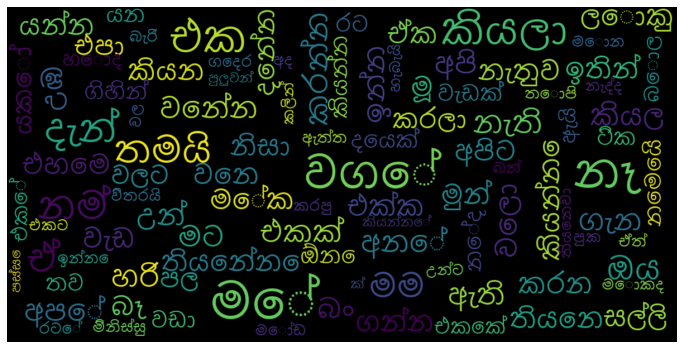

In [54]:
from wordcloud import WordCloud, ImageColorGenerator
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        #stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        font_path='C:/Users/Kavishka/anaconda3/Library/share/fonts/Nirmala.ttf'
        #font_path= 'F:/Downloads/0KDARALIYA Regular/0KDARALIYA Regular/0KDARALIYA Regular.ttf'
        )
   
    wordcloud=wordcloud.generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.show()

show_wordcloud(most_dict)

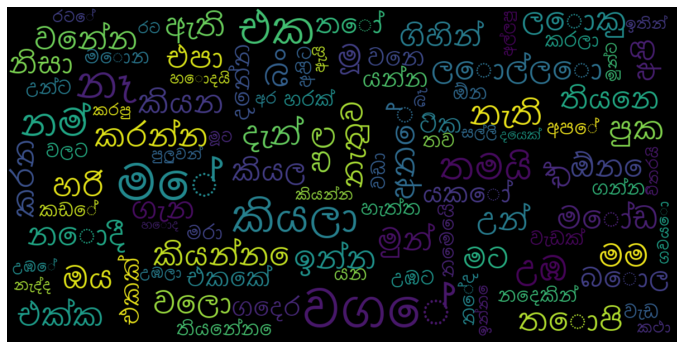

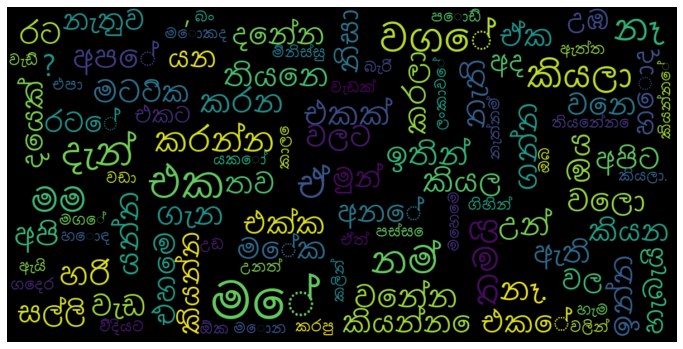

In [49]:
show_wordcloud(hate_dict)
show_wordcloud(non_hate_dict)

### After removing stop words

In [55]:
df['cleaned'] = df['cleaned'].apply(lambda x: utills.removeStopWords(x))
word_count = df['cleaned'].apply(lambda x: len(x.split())).sum()
word_count

93691

In [56]:
from collections import Counter

#plt.rc('font', family='Lohit Devanagari')

results = Counter()
df['cleaned'].str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('නෑ', 1001), ('වගේ', 913), ('එක', 772), ('කියලා', 751), ('තමයි', 535), ('මම', 435), ('ඔය', 379), ('නැති', 359), ('කරන්න', 355), ('ඉන්න', 332)]


In [59]:
words = [word for i in df[df['label'] == 1]['cleaned'].str.split() for word in i]

counter = Counter(words)
most_hate = counter.most_common()
    
most_hate[:20]

[('වගේ', 475),
 ('නෑ', 309),
 ('කියලා', 299),
 ('එක', 293),
 ('තමයි', 201),
 ('උඹ', 191),
 ('නැති', 175),
 ('අනේ', 170),
 ('ඔය', 146),
 ('පල', 142),
 ('මූ', 135),
 ('මම', 128),
 ('ඉන්න', 123),
 ('බං', 120),
 ('වෙලා', 118),
 ('ලොකු', 114),
 ('උන්', 112),
 ('තොපි', 111),
 ('මෝඩ', 107),
 ('වෙන්න', 107)]

In [60]:
words = [word for i in df[df['label'] == 0]['cleaned'].str.split() for word in i]

counter = Counter(words)
most_non_hate = counter.most_common()
    
most_non_hate[:20]

[('නෑ', 692),
 ('එක', 479),
 ('කියලා', 452),
 ('වගේ', 438),
 ('තමයි', 334),
 ('මම', 307),
 ('කරන්න', 263),
 ('එකක්', 233),
 ('ඔය', 233),
 ('අපේ', 226),
 ('හරි', 224),
 ('ඉන්න', 209),
 ('කියල', 206),
 ('වෙලා', 205),
 ('උන්', 191),
 ('වෙන්න', 188),
 ('නැති', 184),
 ('මට', 183),
 ('අපි', 181),
 ('යන්න', 174)]

In [61]:
hate_words = [ w[0] for w in most_hate]
hate_counts = [ w[1] for w in most_hate]
non_hate_words = [ w[0] for w in most_non_hate]
non_hate_counts = [ w[1] for w in most_non_hate]
hate_dict = dict(zip(hate_words, hate_counts))
non_hate_dict = dict(zip(non_hate_words, non_hate_counts))

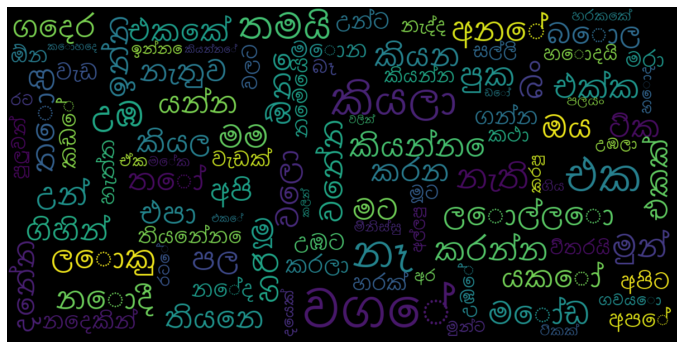

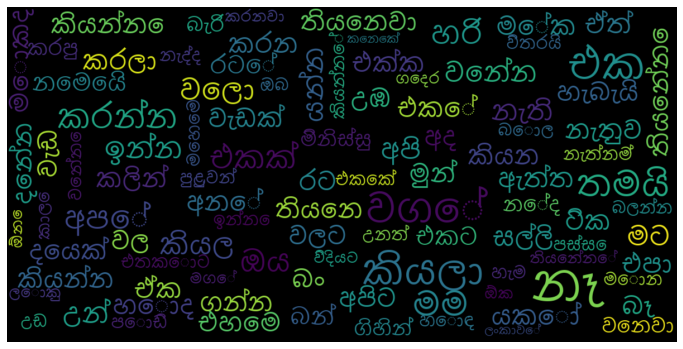

In [62]:
show_wordcloud(hate_dict)
show_wordcloud(non_hate_dict)

## create two hate, not hate dataframe for word cloud withour any preprocessing

In [4]:
path = '../Datasets/processed/no_preprocessing/'
df = pd.read_csv(path+'df_A.csv')    
#df_B = pd.read_csv(path+'df_B.csv')

In [ ]:
df = utills.preprocess(df_A,'comment')

In [ ]:
df['cleaned'] = df['cleaned'].apply(lambda x: utills.removeStopWords(x))

In [ ]:
words = [word for i in df[df['label'] == 1]['cleaned'].str.split() for word in i]

counter = Counter(words)
most_hate = counter.most_common()
    
most_hate[:10]

In [ ]:
words = [word for i in df[df['label'] == 0]['cleaned'].str.split() for word in i]

counter = Counter(words)
most_non_hate = counter.most_common()
    
most_non_hate[:10]

In [ ]:
def removeCommonsW(common_words):
    for w in remove_stop_words:
        if w in stop_words:
            stop_words.remove(w)
    return ' '.join([(w if w not in stop_words else ' ') for w in txt.split()])

In [ ]:
df['cleaned'] = df['cleaned'].apply(lambda x: utills.removeCommonsW(x))
df['cleaned'] = df['cleaned'].apply(lambda x: utills.removeCommonsW(x))

In [10]:
df_hate = df_A[df_A['label']==1]['comment']
df_hate.to_csv("df_hate_2.csv",index=False)
df_hate.head()

0            මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?
1                                           තූ ෙනදකින්
4                                  පූදින්ෙන නැතුව ඉදිං
5    ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් ද...
7    උඹ එක්ක එකඟවෙන්න පුලුවන් කථාවක් තමයි අද බොලා ක...
Name: comment, dtype: object

In [ ]:
df_not_hate = df_A[df_A['label']==0]['comment']
df_not_hate.to_csv("df_not_hate_2.csv",index=False)